In [9]:
import pandas as pd
import numpy as np
import pickle 

# LOAD DF

In [129]:
df = pd.read_csv(
    "./csv/data_2022_all_features_cleaned_scaled.csv",
    index_col="ID",
    low_memory=False)

In [131]:
from sklearn.model_selection import train_test_split
y = df["Ewltp"]
X = df.drop(["Ewltp"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DNN

In [134]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import callbacks
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout

In [136]:
early_stopping = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=20,
    mode="min",
    restore_best_weights=True)

lr_plateau = callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    patience=5,
    factor=0.8,
    verbose=2,
    mode="min")



In [138]:
# Using same Scaler from ML
input_shape = (X_train.shape[1],)

model = Sequential()
model.add(Input(shape=input_shape))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(loss='mae', optimizer='adam', metrics=['mse','mae'])

# Model Summary

In [141]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 16)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 2048)           │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 955,777 (3.65 MB)

 Trainable params: 955,777 (3.65 MB)

 Non-trainable params: 0 (0.00 B)

# Fitting

In [144]:
history = model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=30, 
        validation_split=0.2, 
        callbacks=[early_stopping, lr_plateau])

Epoch 1/200
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.0228 - mae: 0.0228 - mse: 0.0014 - val_loss: 0.0127 - val_mae: 0.0127 - val_mse: 3.0443e-04 - learning_rate: 0.0010
Epoch 2/200
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0138 - mae: 0.0138 - mse: 3.6107e-04 - val_loss: 0.0132 - val_mae: 0.0132 - val_mse: 3.4021e-04 - learning_rate: 0.0010
Epoch 3/200
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0134 - mae: 0.0134 - mse: 3.3690e-04 - val_loss: 0.0120 - val_mae: 0.0120 - val_mse: 2.7851e-04 - learning_rate: 0.0010
Epoch 4/200
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0126 - mae: 0.0126 - mse: 3.0991e-04 - val_loss: 0.0119 - val_mae: 0.0119 - val_mse: 2.7777e-04 - learning_rate: 0.0010
Epoch 5/200
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0121 - mae: 0.0121 - mse: 2.9276e-04 - val_loss: 0.0121 - val_mae: 0.0121 - val_mse: 2.8284e-04 - learning_rate: 0.0010
Epoch 6/200
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.012

# Save model

In [147]:
model.save("./models/DNN_regression.keras") 

# Graphe History

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

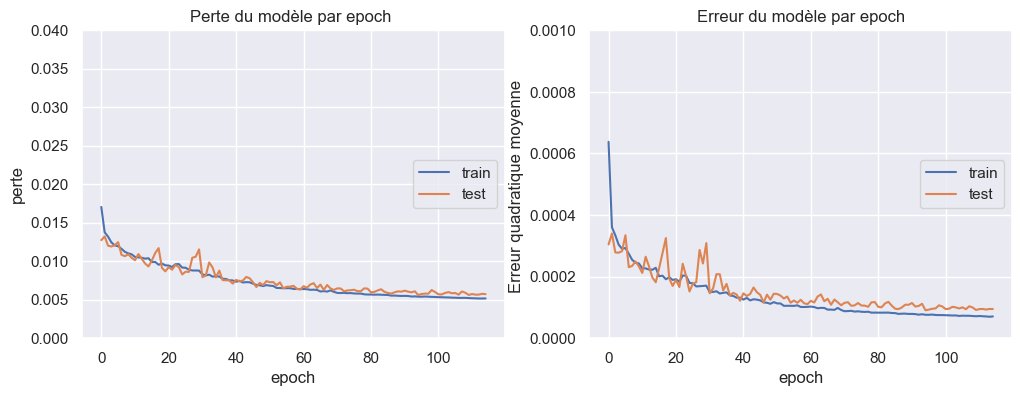

In [152]:
sns.set()
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perte du modèle par epoch ')
plt.ylabel('perte')
plt.xlabel('epoch')
plt.ylim((0, 0.04))
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Erreur du modèle par epoch')
plt.ylabel('Erreur quadratique moyenne ')
plt.xlabel('epoch')
plt.ylim((0, 1e-3))
plt.legend(['train', 'test'], loc='right');
plt.show()
plt.close()

# Prédictions

In [155]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

2058/2058 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# Import scaler

In [158]:
file = open("./csv/scaler_all_data_2022.pkl", "rb")
scaler = pickle.load(file)
file.close()

# Remise à léchelle des données

df_train = X_train.copy()
df_train_pred = X_train.copy()

In [231]:
# On recrée le df_train et on applique la transformation inverse
# On est obliger d'utiliser toutes les features car le scaler a été fitté avec le DF entier
df_train.insert(1, "Ewltp", y_train)
df_train[df_train.columns] = scaler.inverse_transform(df_train[df_train.columns])

df_train_pred.insert(1, "Prediction", y_pred_train)
df_train_pred[df_train_pred.columns] = scaler.inverse_transform(df_train_pred[df_train_pred.columns])
df_train_pred["Prediction"] = df_train_pred["Prediction"].round(2)

In [233]:
# On recrée le df_test et on applique la transformation inverse
df_test = X_test.copy()
df_test_pred = X_test.copy()

In [235]:
df_test.insert(1, "Ewltp", y_test)
df_test[df_test.columns] = scaler.inverse_transform(df_test[df_test.columns])

df_test_pred.insert(1, "Prediction", y_pred_test)
df_test_pred[df_test_pred.columns] = scaler.inverse_transform(df_test_pred[df_test_pred.columns])
df_test_pred["Prediction"] = df_test_pred["Prediction"].round(2)

# Graphes

In [293]:
df_metrics_train = pd.DataFrame({
        "y_pred": df_train_pred["Prediction"],
        "y_train": df_train["Ewltp"],
        "residus": df_train["Ewltp"] - df_train_pred["Prediction"],
    })

In [295]:
df_metrics_test = pd.DataFrame({
        "y_pred": df_test_pred["Prediction"],
        "y_train": df_test["Ewltp"],
        "residus": df_test["Ewltp"] - df_test_pred["Prediction"],
    })

# Graphe Train

In [297]:
import scipy.stats as stats
pd.option_context('mode.use_inf_as_na', True)

In [299]:
res_max = df_metrics_train["residus"].max()
res_min = df_metrics_train["residus"].min()
res_m1 = max(abs(res_min), abs(res_max))

res_max = df_metrics_test["residus"].max()
res_min = df_metrics_test["residus"].min()
res_m2 = max(abs(res_min), abs(res_max))
res_max = max(res_m1, res_m2)

C:\Users\Kogitos\anaconda3\envs\DST-FEV-24-PROJECT\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Résidus pour training ')

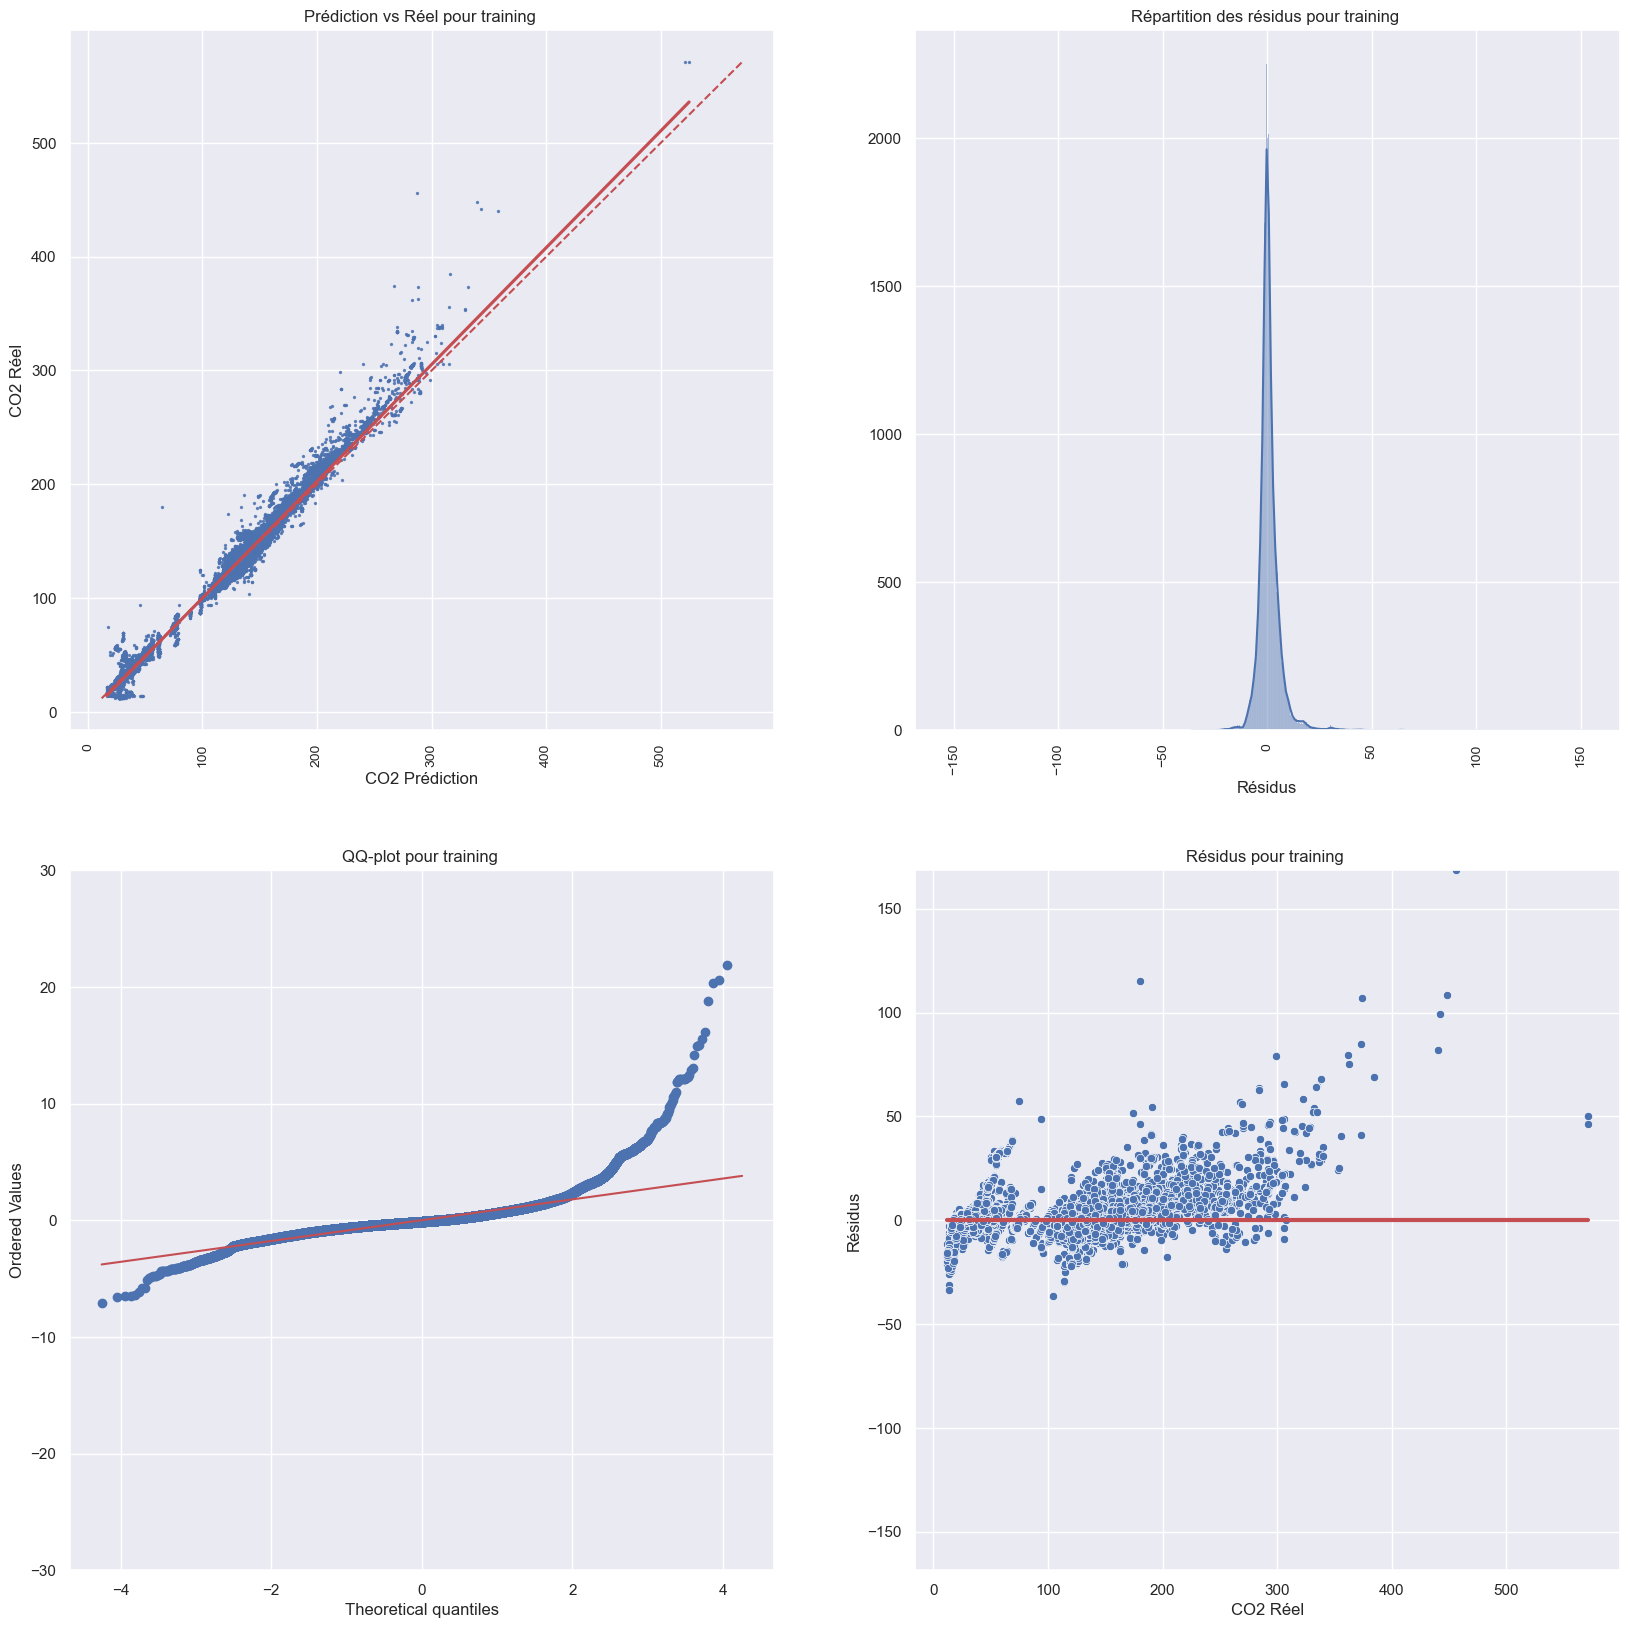

In [301]:
sns.set()
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
gfg = sns.regplot(data=df_metrics_train, x="y_pred", y="y_train", fit_reg=True, line_kws=dict(color="r"), scatter_kws={'s':2})
ax = plt.plot((df_metrics_train["y_train"].min(), df_metrics_train["y_train"].max()), 
              (df_metrics_train["y_train"].min(), df_metrics_train["y_train"].max()), "--", c="r")
plt.xlabel("CO2 Prédiction")
plt.ylabel("CO2 Réel")
plt.title("Prédiction vs Réel pour training ")
plt.xticks(rotation=90, fontsize="small")

plt.subplot(2, 2, 2)
gfg = sns.histplot(data=df_metrics_train, x="residus", kde=True, line_kws=dict(color="r"))
# ax = plt.plot((y_train.min(), y_train.max()), (y_train.min(), y_train.max()), c="r")
plt.xlabel("Résidus")
plt.ylabel("")
plt.xlim(-res_max, res_max)
plt.title("Répartition des résidus pour training ")
plt.xticks(rotation=90, fontsize="small")

residus_norm = (df_metrics_train["residus"] - df_metrics_train["residus"].mean()) / df_metrics_train["residus"].std()
plt.subplot(2, 2, 3)
s = stats.probplot(residus_norm, plot=plt)
plt.ylim(-30, 30)
plt.title("QQ-plot pour training ")

plt.subplot(2, 2, 4)
sns.scatterplot(data=df_metrics_train, x="y_train", y="residus", color="b")
plt.plot((df_metrics_train["y_train"].min(), df_metrics_train["y_train"].max()), (0, 0), lw=3, color="r")
plt.ylim(-res_max, res_max)
plt.xlabel("CO2 Réel")
plt.ylabel("Résidus")
plt.title("Résidus pour training ")


# Graphe TEST

C:\Users\Kogitos\anaconda3\envs\DST-FEV-24-PROJECT\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Résidus pour test ')

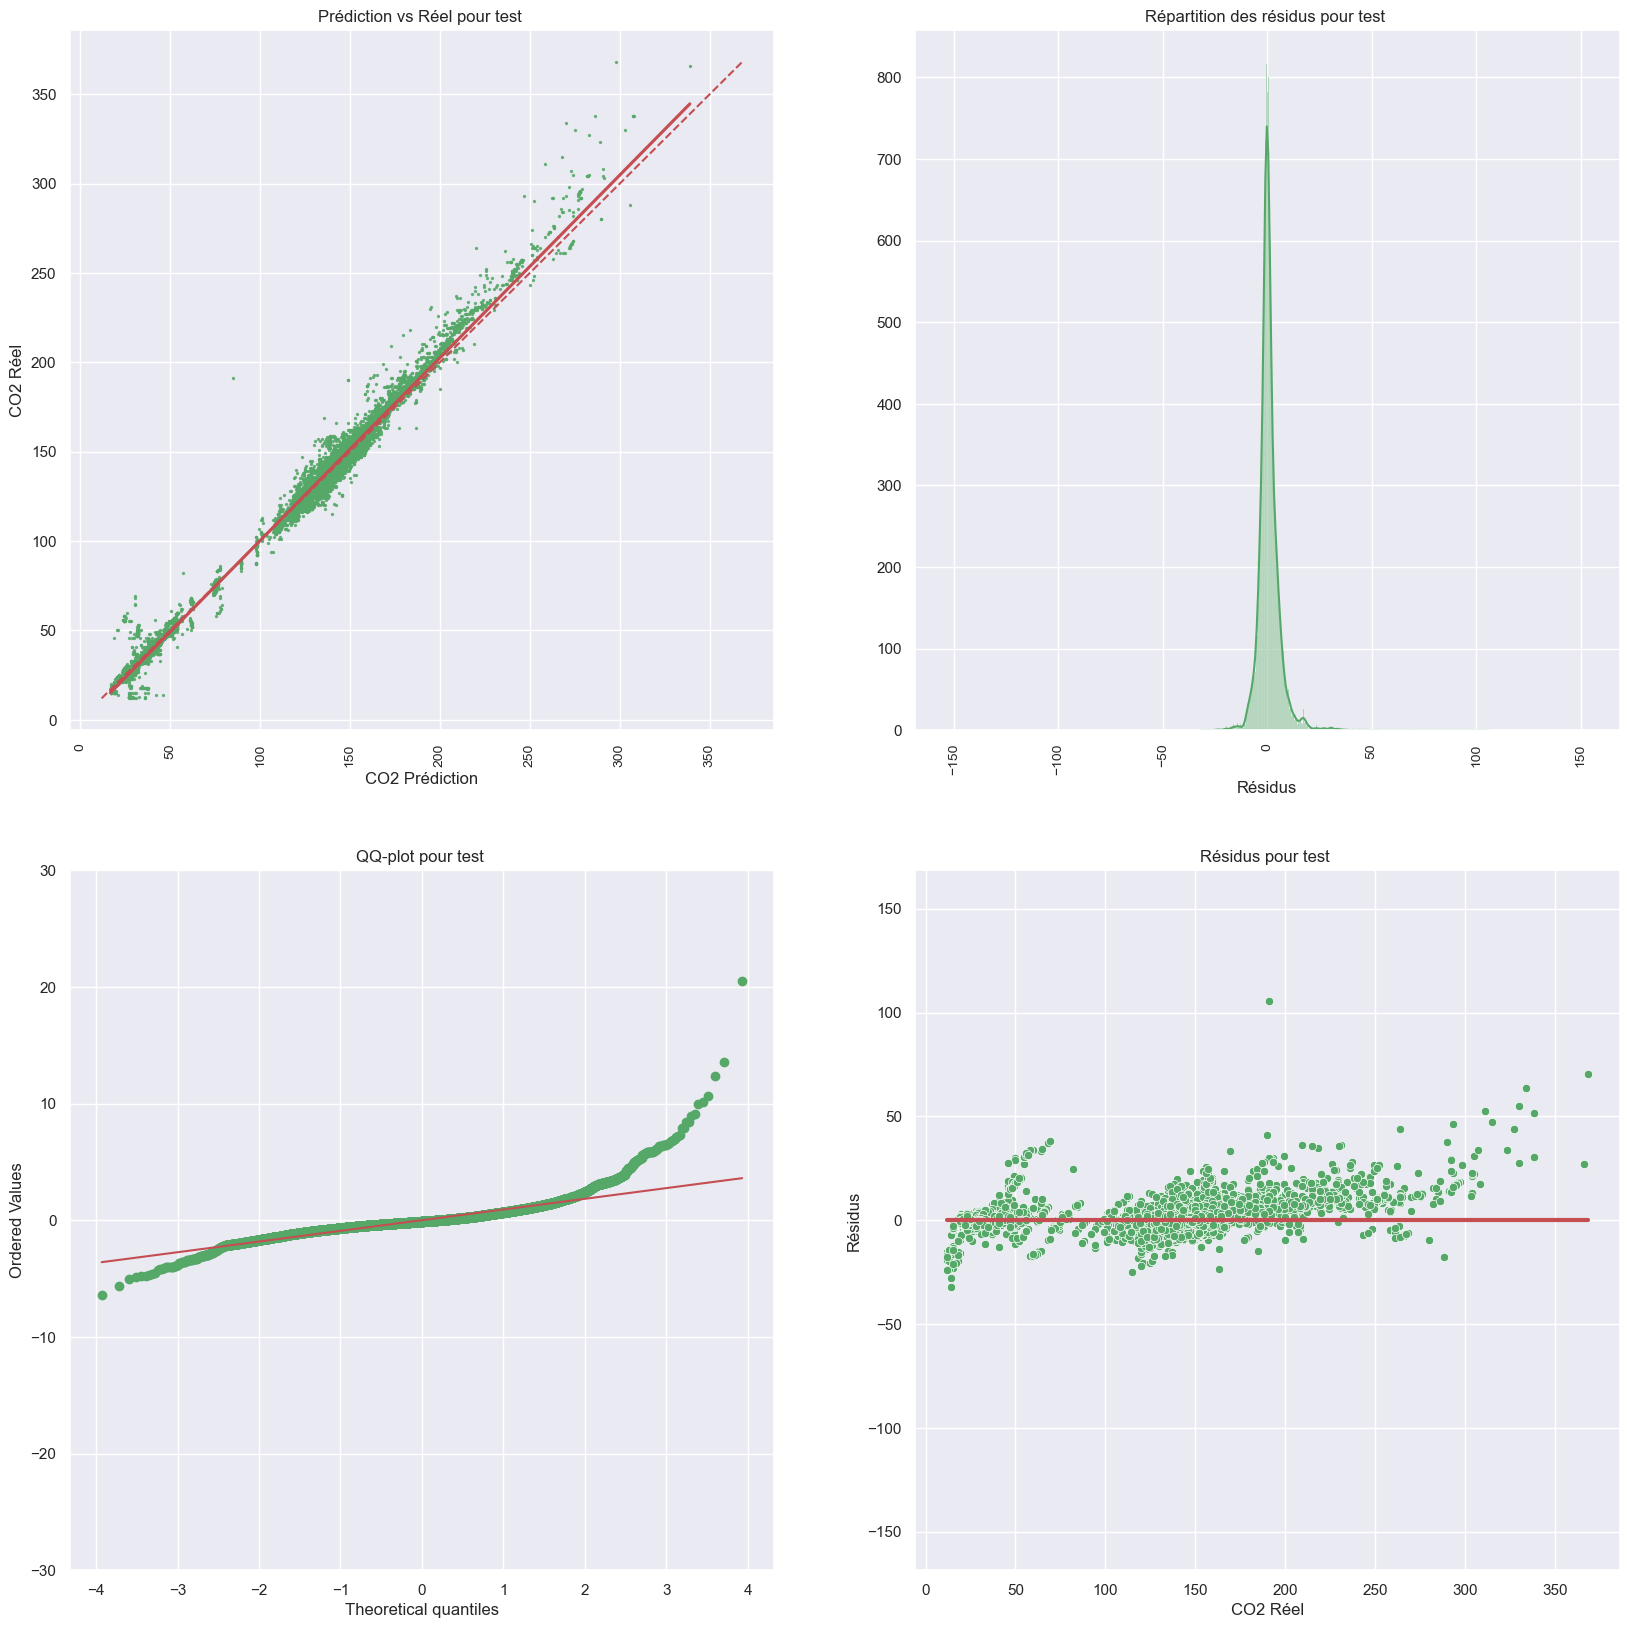

In [317]:
sns.set()
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
gfg = sns.regplot(data=df_metrics_test, x="y_pred", y="y_train", color="g", fit_reg=True, line_kws=dict(color="r"), scatter_kws={'s':2})
ax = plt.plot((df_metrics_test["y_train"].min(), df_metrics_test["y_train"].max()), 
              (df_metrics_test["y_train"].min(), df_metrics_test["y_train"].max()), "--", c="r")
plt.xlabel("CO2 Prédiction")
plt.ylabel("CO2 Réel")
plt.title("Prédiction vs Réel pour test ")
plt.xticks(rotation=90, fontsize="small")

plt.subplot(2, 2, 2)
gfg = sns.histplot(data=df_metrics_test, x="residus", kde=True, color="g", line_kws=dict(color="r"))
# ax = plt.plot((y_train.min(), y_train.max()), (y_train.min(), y_train.max()), c="r")
plt.xlabel("Résidus")
plt.ylabel("")
plt.xlim(-res_max, res_max)
plt.title("Répartition des résidus pour test ")
plt.xticks(rotation=90, fontsize="small")

residus_norm = (df_metrics_test["residus"] - df_metrics_test["residus"].mean()) / df_metrics_test["residus"].std()
ax = plt.subplot(2, 2, 3)
s = stats.probplot(residus_norm, plot=plt)
ax.get_lines()[0].set_markerfacecolor('g')
ax.get_lines()[0].set_color('g')
plt.ylim(-30, 30)
plt.title("QQ-plot pour test ")

plt.subplot(2, 2, 4)
sns.scatterplot(data=df_metrics_test, x="y_train", y="residus", color="g")
plt.plot((df_metrics_train["y_train"].min(), df_metrics_test["y_train"].max()), (0, 0), lw=3, color="r")
plt.ylim(-res_max, res_max)
plt.xlabel("CO2 Réel")
plt.ylabel("Résidus")
plt.title("Résidus pour test ")

# Scores

In [325]:
from sklearn.metrics import r2_score

print("R2 Train: ", r2_score(df_metrics_train["y_train"], df_metrics_train["y_pred"]))
print("R2 Test:  ", r2_score(df_metrics_test["y_train"], df_metrics_test["y_pred"]))

R2 Train:  0.9876406950412754
R2 Test:   0.9882015978335951


# SHAP

In [4]:
from keras.models import load_model
model = load_model("./models/DNN_regression.keras")

In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv(
    "./csv/data_2022_all_features_cleaned_scaled.csv",
    index_col="ID",
    low_memory=False)

In [13]:
from sklearn.model_selection import train_test_split
y = df["Ewltp"]
X = df.drop(["Ewltp"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
import shap

In [76]:
shap.initjs()

In [78]:
def f(X):
    return model.predict(X).flatten()

In [120]:
explainer = shap.KernelExplainer(f, X.iloc[:100, :])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [122]:
shap_values = explainer.shap_values(X.iloc[:100, :])

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
394/394 ━━━━━━

In [124]:
shap.force_plot(explainer.expected_value, shap_values, X.iloc[:100, :])

In [148]:
# shap.plots.beeswarm(explainer)